# USE matplotlib.org

In [100]:
#First load relevant packages
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

might see %matplotlib inline in older versions
makes it show the plot below the cell

In [119]:
#next need smth to plot
x = np.linspace(-2*np.pi,2*np.pi, 1001, endpoint = True)
y = np.cos(x)
z = np.sin(3*x)

In [120]:
#use plt module directly to plot smth

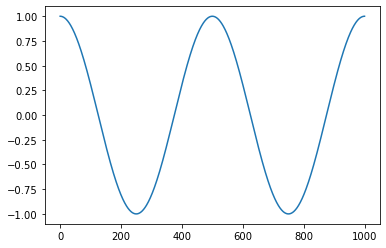

In [121]:
plt.plot(y)

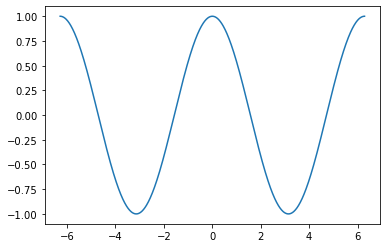

In [122]:
# can see that x axis values are wrong. it is using the index of the array
#we have to tell the plot the proper thing to do
plt.plot(x,y)

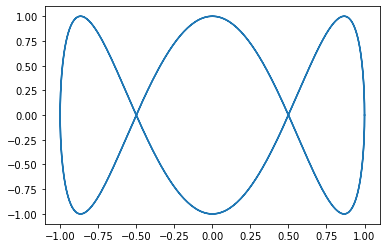

In [123]:
plt.plot(y,z)

## Figures and Axes
plt has 2 main object types or classes, the figure and the axes objects.
the figure object is responable for layout
Axes is actual stuff that you see

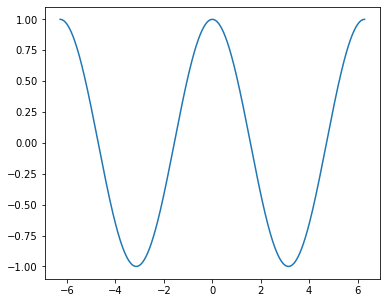

In [124]:
fig= plt.figure(figsize=(6,5))
ax= fig.add_subplot()
ax.plot(x,y)
#Look at what happens if we take either of these out

Lets generate a plot incrementally
A figure can contain several axes

[]

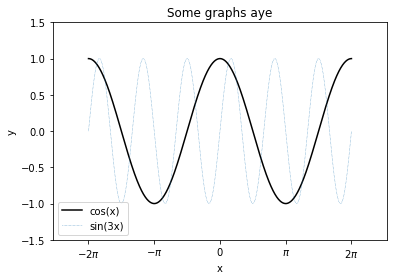

In [126]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot()
ax.set_xticks( #Changing the steps in the x axis
    [-2*np.pi, -np.pi,0,  np.pi, 2*np.pi]
    )
ax.set_xticklabels( #Changing the labels of the steps
    ["$-2\pi$", "$-\pi$", "0", "$\pi$", "$2\pi$"]
)
ax.set_xlim(-8,8)
ax.set_ylim(-1.5,1.5)#Setting the extent of the graph
ax.plot(x,y, '-', color='black', label ='cos(x)') #The - says keep it as a solid line,
ax.plot(x,z, ':', linewidth=0.5, label = 'sin(3x)') #placing the colon makes this line doted
ax.legend() #adding a legend
ax.set_title("Some graphs aye")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.savefig('trig.png')#####To save plot use this (will appear in the same folder as this notebook)
plt.savefig('trig1.jpg')
plt.plot()

A figure can contain several axes

In [ ]:
fig=plt.figure(figsize=(6,3)) #Creating different subplots
#1,2,1 means 1 row 2 colums for the 1st fig
ax1=fig.add_subplot(1,2,1) # the 3rd number (1) means apply to 1st figure) 
ax2=fig.add_subplot(1,2,2) #the 3rd number (2) means apply to 2nd figure)
ax1.plot(x,y)
ax2.plot(x,z)

can do this a few more ways

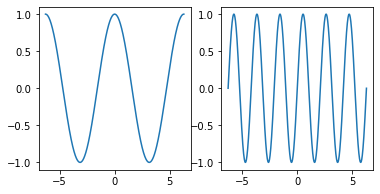

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(6,3))
axes[0].plot(x,y)
axes[1].plot(x,z)

## Plotting 2D data
4 main methods

imshow -- fast and simple for regularly spaced data
pcolormesh -- mainly for irregularly spaced data
contour - contour plots
contourf - filled color plots

In [109]:
x = np.linspace(-2*np.pi, 2*np.pi, 1001, endpoint=True)

y = np.linspace(-np.pi, np.pi, 501, endpoint=True)
XX, YY = np.meshgrid(x,y)
V = np.sin(XX) * np.cos(YY)

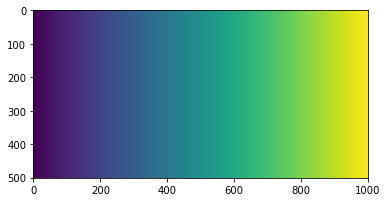

In [110]:
plt.imshow(XX)

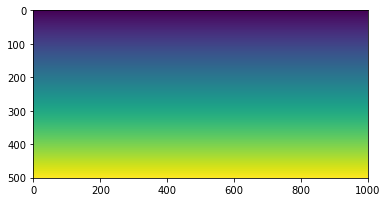

In [111]:
plt.imshow(YY)

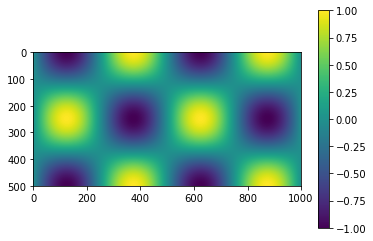

In [112]:
plt.imshow(V)
plt.colorbar()

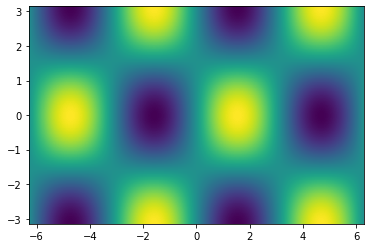

In [113]:
plt.pcolormesh(x, y, V, shading='auto')

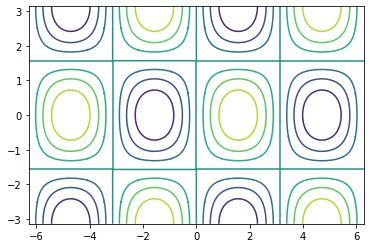

In [114]:
plt.contour(x, y, V, )

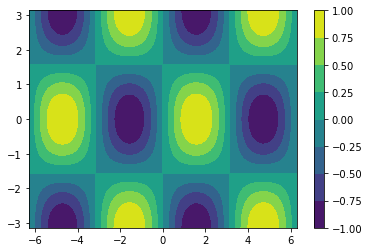

In [115]:
plt.contourf(x, y, V)
plt.colorbar()

In [155]:
ds = xr.open_dataset('http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')

In [156]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 1872)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                     CSIRO (Commonwealth Scientific and Indus...
    institute_id:                    CSIRO-BOM
    experiment_id:                   historical
    source:                          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N...
    model_id:                        ACCESS1.3
    forcing:                         GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2,...
    parent_experiment_id:            piControl
    parent_experiment_rip:           r1i1p1
    branch_time:                     90945.0
    contact:                         The ACCESS wiki: http://wiki.csiro.au/co...
    history:                         Fri Apr 13 09:38:12 2012: ncatted -a for...
    references:                      See http://wiki.csiro.au/confluence/disp...
    initialization_method:           1
    physics_version:                 1
    tracking_id:                     7f51888d-7daa-45b3-b568-9ce3288b333d
    version_number:                  v20120413
    product:                         output
    experiment:                      historical
    frequency:                       mon
    creation_date:                   2012-02-05T23:50:03Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) 9c851218e3842...
    title:                           ACCESS1-3 model output prepared for CMIP...
    parent_experiment:               pre-industrial control
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.8.0
    DODS_EXTRA.Unlimited_Dimension:  time

In [157]:
pressure = ds.tas.sel(lat=slice(-80,80)) #This isnt actually pressure just doing this so its easier to follow lessons example

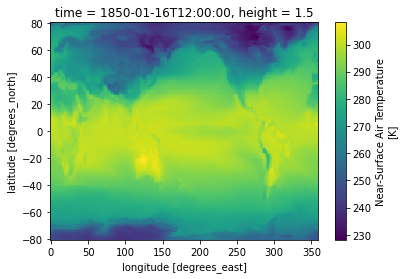

In [158]:
pressure.isel(time=0).plot()

In [159]:
#create own figure to get more control over the plot then tell xarray to p[lot in thre]

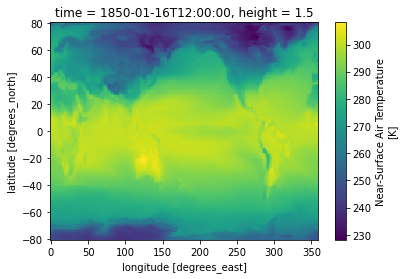

In [160]:
fig, ax = plt.subplots(figsize=(6,4))
pressure.isel(time=0).plot(ax=ax) # We now have control ...
#over the axis as we tell the xarray axis to = the axis we defined before
#gives more options and can use cartopy - world map plots

In [161]:
#to use one of the many types of cartopy see the documentation

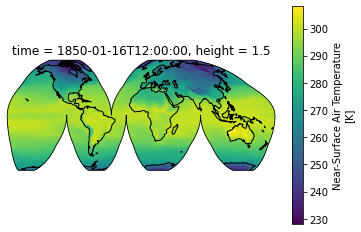

In [163]:
fig, ax = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.InterruptedGoodeHomolosine()})
ax.coastlines()
pressure.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree()) #also need to transform our rectanuglarly space data to this shape

In [164]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 1872)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1850-01-01 1850-02-01 ... 2006-01-01
    lat_bnds   (lat, bnds) float64 -90.0 -89.38 -89.38 ... 89.38 89.38 90.0
    lon_bnds   (lon, bnds) float64 -0.9375 0.9375 0.9375 ... 357.2 357.2 359.1
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:                     CSIRO (Commonwealth Scientific and Indus...
    institute_id:                    CSIRO-BOM
    experiment_id:                   historical
    source:                          ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N...
    model_id:                        ACCESS1.3
    forcing:                         GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2,...
    parent_experiment_id:            piControl
    parent_experiment_rip:           r1i1p1
    branch_time:                     90945.0
    contact:                         The ACCESS wiki: http://wiki.csiro.au/co...
    history:                         Fri Apr 13 09:38:12 2012: ncatted -a for...
    references:                      See http://wiki.csiro.au/confluence/disp...
    initialization_method:           1
    physics_version:                 1
    tracking_id:                     7f51888d-7daa-45b3-b568-9ce3288b333d
    version_number:                  v20120413
    product:                         output
    experiment:                      historical
    frequency:                       mon
    creation_date:                   2012-02-05T23:50:03Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) 9c851218e3842...
    title:                           ACCESS1-3 model output prepared for CMIP...
    parent_experiment:               pre-industrial control
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.8.0
    DODS_EXTRA.Unlimited_Dimension:  time

To plot the winds over australia
if you were to add another dataset of the winds with variables (or one that was combined in this dataset alreday)
x_wind 
y_wind
that corresponded to lat_0 and lon_0



In [190]:
au_ds = ds.isel(time=0).sel(lon=slice(0,360), lat=slice(-45,-8))
        #lon_0=slice(110, 160),
       # lat_0=slice(-45,-8)

In [186]:
au_pr=au_ds['tas'].isel(time=0)
#au_xwind = au_ds['x_wind'].isel(time=0)
#au_ywind = au_ds['y_wind'].isel(time=0)
#x = au_ds['longitude_0']
#y = au_ds['latitude_0']


In [187]:
loc_x = [134,121,150]
loc_y = [-30, -12, -21]

C:\Users\Jamie\miniconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\Jamie\miniconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


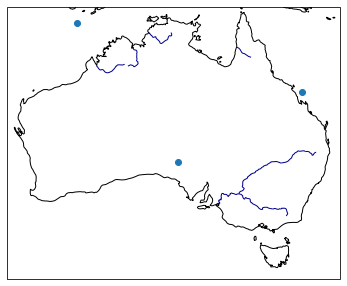

In [189]:
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_extent([112,155,-43,-10])
#ax.quiver(x, y, au_xwind, au_ywind, pivot='middle') #adding winds as an arrow see matplot.lib documents
ax.add_feature(cfeature.RIVERS, edgecolor='darkblue') #part of cartopy set (has land, oceans, rivers, lakes, borders so on)
ax.scatter(loc_x, loc_y, transform=ccrs.PlateCarree()) # adding points on the map that are defined above
plt.show()
